In [4]:
import do_functions as do
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from matplotlib.font_manager import FontProperties
from tqdm.notebook import tqdm

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

In [5]:
df = do.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = do.clean_dataframe(df)

In [38]:
his = np.arange(0.1,11.,0.1)
hfs = np.arange(1.,21.,0.1)
df

,roid,lat,lon,startimeUTC,az_surf,meanP_2,precipBelow12,precipBelow6,irTemp_below,dphi_0010,...,h391,h392,h393,h394,h395,h396,h397,h398,h399,h400
0,PAZ1.2018.130.20.55.G18,37.48,126.10,2018-05-10 20:55:41,-30.59,0.00,0.001,0.000,236,-0.055016,...,0.657319,0.561302,0.453678,0.413606,0.423642,0.358429,0.313858,0.299540,0.329093,0.301198
1,PAZ1.2018.130.21.01.G19,4.68,153.15,2018-05-10 21:01:40,61.29,0.03,0.044,0.040,211,-0.017083,...,0.388286,0.376438,0.316907,0.303784,0.237429,0.229576,0.131511,0.020837,-0.010168,-0.107573
2,PAZ1.2018.130.21.10.G24,-16.88,135.77,2018-05-10 21:10:33,19.90,0.00,0.001,0.000,242,-0.065611,...,-0.096078,-0.092646,-0.021363,-0.009680,-0.004799,-0.060674,-0.032557,0.026656,0.083702,0.040231
3,PAZ1.2018.130.21.16.G10,-36.43,112.66,2018-05-10 21:16:14,-7.23,0.00,0.000,0.000,251,0.020166,...,-0.017869,-0.089222,-0.166217,-0.170754,-0.122106,-0.222287,-0.267388,-0.316209,-0.349521,-0.330845
4,PAZ1.2018.130.21.39.G29,-53.91,-64.58,2018-05-10 21:39:06,-147.99,0.01,0.004,0.002,228,0.030036,...,0.015577,0.010131,-0.007171,-0.013827,0.019190,0.006500,0.052092,0.063766,0.077721,0.111858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93052,PAZ1.2022.031.20.14.G13,-27.16,138.07,2022-01-31 20:13:55,1.13,0.54,0.697,0.671,224,1.841160,...,-0.187433,-0.265384,-0.251428,-0.209926,-0.228418,-0.188364,-0.144678,-0.114919,-0.165454,-0.148727
93053,PAZ1.2022.031.20.56.G31,13.31,-36.69,2022-01-31 20:56:57,151.54,0.00,0.000,0.000,270,-0.085092,...,-0.077407,-0.070182,-0.059642,-0.022276,0.018134,-0.010405,0.012951,0.041839,-0.032065,-0.049576
93054,PAZ1.2022.031.21.00.G03,24.62,-53.73,2022-01-31 21:00:29,-179.48,0.04,0.012,0.014,232,-0.325563,...,0.124019,0.113161,0.103820,0.077413,0.100516,0.145444,0.136346,0.124060,0.137998,0.094240
93055,PAZ1.2022.031.21.04.G04,38.95,-67.93,2022-01-31 21:04:21,-169.71,0.07,0.017,0.045,252,-0.873391,...,0.039079,0.040218,-0.025640,0.015339,0.024858,0.055605,0.035608,0.089771,0.103440,0.132603


### 99% percentile for True precipitation

In [16]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.99)
            matrix[i][j] = array[4]
            results.append(array)

            
            

0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [17]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[ 0.1         6.4         4.70893    10.0059379   0.42071197]


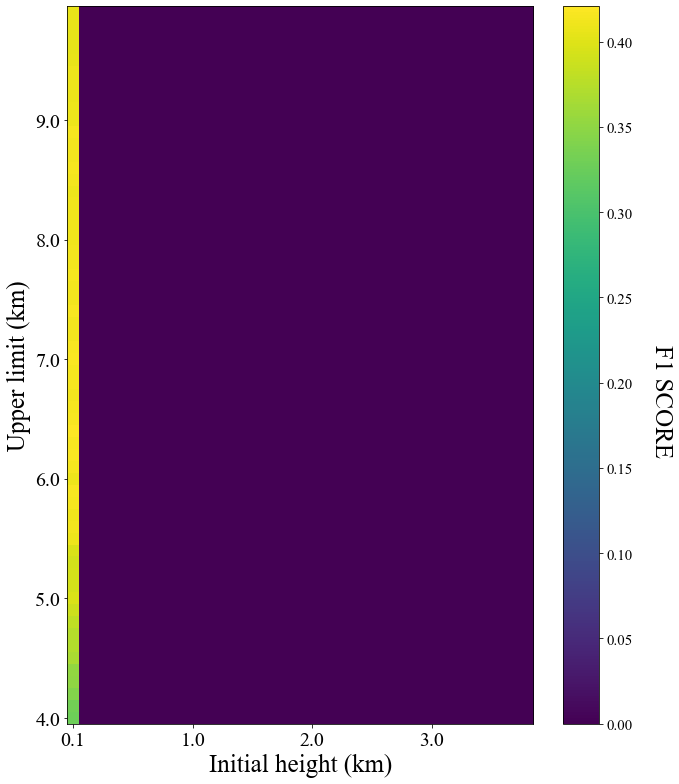

In [7]:
plt.figure(figsize=(17,11), tight_layout=True)
plt.imshow(matrix[1:40,40:100].T)

plt.gca().invert_yaxis()

plt.xticks(ticks=[0,10,20,30], 
           labels=['0.1','1.0','2.0','3.0'],
           fontproperties=font, 
           fontsize=20)
plt.yticks(ticks=[0,10,20,30,40,50], 
           labels=['4.0','5.0','6.0','7.0','8.0','9.0'],
           fontproperties=font, 
           fontsize=20)
       
plt.xlabel('Initial height (km)', 
           fontproperties=font,
           fontsize=25)
plt.ylabel('Upper limit (km)',
           fontproperties=font,
           fontsize=25)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(15)
        
cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=25,labelpad=40, y=0.45)


For the avg_dphi h001 - h073 :
Optimal threshold: = 4.52
F1score: 0.537

For the avg_dphi h023 - h200 :
Optimal threshold: = 1.71
F1score: 0.498

For the avg_dphi h001 - h010 :
Optimal threshold: = 6.39
F1score: 0.446

For the avg_dphi h005 - h011 :
Optimal threshold: = 5.37
F1score: 0.411

For the avg_dphi h014 - h350 :
Optimal threshold: = 0.94
F1score: 0.508

For the avg_dphi h100 - h120 :
Optimal threshold: = 1.37
F1score: 0.347



([<matplotlib.axis.YTick at 0x7f82e8bda940>,
 [Text(0, 0, '0'), Text(0, 1, '1.0')])

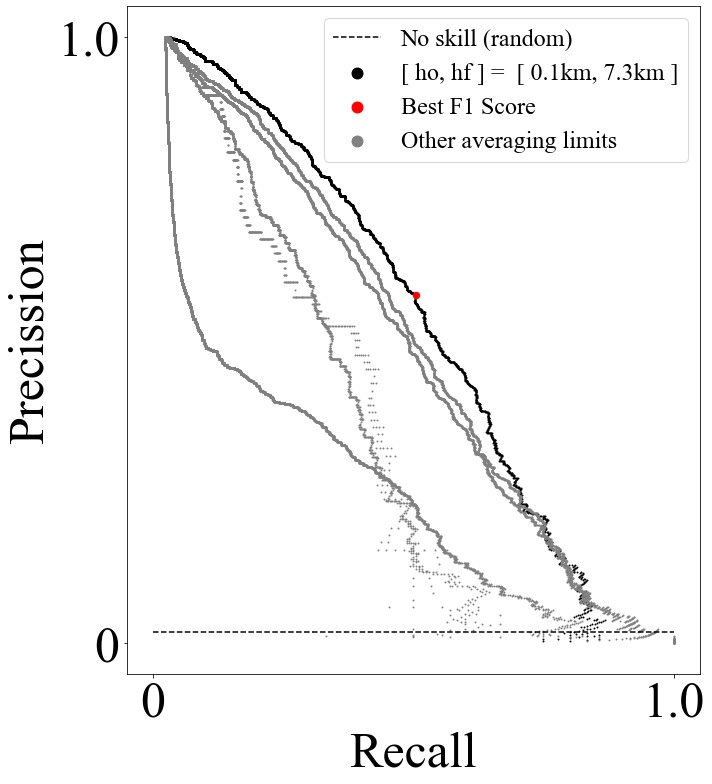

In [36]:
p1,r1,p11,r11,truth,label1 = do.getPrecisionRecall(df,0.1,7.3,0.95)
no_skill = len(truth[truth==1]) / len(truth)

p2,r2,p22,r22,truth2,label2 = do.getPrecisionRecall(df,2.3,20.0,0.95)
p3,r3,p33,r33,truth3,label3 = do.getPrecisionRecall(df,0.1,1.0,0.95)
p4,r4,p44,r44,truth4,label4 = do.getPrecisionRecall(df,0.5,1.1,0.95)
p5,r5,p55,r55,truth5,label5 = do.getPrecisionRecall(df,1.4,35,0.95)
p6,r6,p66,r66,truth6,label6 = do.getPrecisionRecall(df,10.0,12.0,0.95)

plt.figure(figsize=(10,11), tight_layout=True)

plt.scatter(p1,r1,label='[ ho, hf ] =  [ 0.1km, 7.3km ]',s=0.9,c='black')
plt.scatter(p11,r11,label='Best F1 Score',s=40,c='r')

plt.scatter(p2,r2,label='Other averaging limits',s=0.9,c='gray')
plt.scatter(p3,r3,s=0.9,c='gray')
plt.scatter(p4,r4,s=0.9,c='gray')
plt.scatter(p5,r5,s=0.9,c='gray')
plt.scatter(p6,r6,s=0.9,c='gray')


plt.plot([0, 1], [no_skill, no_skill], linestyle='--', c='black',label='No skill (random)')


lgnd = plt.legend(scatterpoints=1,
                  prop= FontProperties(family='Times New Roman',style='normal', size=24))

lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [120]
lgnd.legendHandles[2]._sizes = [120]
lgnd.legendHandles[3]._sizes = [120]




plt.xlabel('Recall', 
           fontproperties=font,
           fontsize=50)
plt.ylabel('Precission',
           fontproperties=font,
           fontsize=50)

plt.xticks(ticks=[0,1], 
           labels=['0','1.0'],
           fontproperties=font, 
           fontsize=50)
plt.yticks(ticks=[0,1], 
           labels=['0','1.0'],
           fontproperties=font, 
           fontsize=50)

### 98% percentile for True precipitation

In [18]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.98)
            matrix[i][j] = array[4]
            results.append(array)

            

0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [19]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        7.7        3.31908    6.74813688 0.46387833]


### 97% percentile for True precipitation

In [20]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.97)
            matrix[i][j] = array[4]
            results.append(array)

            

0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [21]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        6.         2.76098    5.93939714 0.51838235]


### 96% percentile for True precipitation

In [22]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.96)
            matrix[i][j] = array[4]
            results.append(array)

            

0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [23]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        6.         2.26992    5.93939714 0.54019293]


### 95% percentile for True precipitation


In [3]:
his = np.arange(0.1,11.,0.1)
hfs = np.arange(1.,21.,0.1)
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.95)
            matrix[i][j] = array[4]
            results.append(array)

            

0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [4]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        7.3        1.946      4.52484714 0.53745928]


In [31]:
matrix[1,73]

0.537459283387622

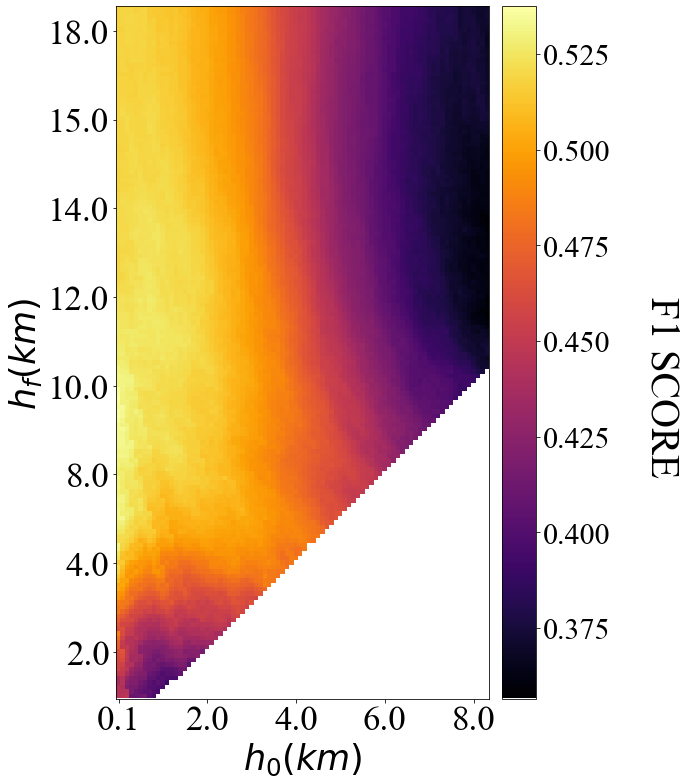

In [94]:
matrix = np.ma.masked_equal(matrix,0)
matrix[44,:] = (matrix[43,:]+matrix[45,:])/2.0

plt.figure(figsize=(17,11), tight_layout=True)

plt.subplot(121)
plt.imshow(matrix[1:85,10:166].T,cmap='inferno')

plt.gca().invert_yaxis()

plt.xticks(ticks=[0,20,40,
                  60,80], 
           labels=['0.1','2.0','4.0',
                   '6.0','8.0'],
           fontproperties=font, 
           fontsize=35)
plt.yticks(ticks=[10,30,
                  50,70,90,
                  110,130,150], 
           labels=['2.0','4.0','8.0',
                   '10.0','12.0','14.0',
                   '15.0','18.0'],
           fontproperties=font, 
           fontsize=35)
       
plt.xlabel(r'$h_0 (km)$', 
           fontproperties=font,
           fontsize=35)
plt.ylabel(r'$h_f (km)$',
           fontproperties=font,
           fontsize=35)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(30)
        

cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=40,labelpad=70, y=0.45)

In [3]:
matrix = np.ma.masked_equal(matrix,0)
matrix[44,:] = (matrix[43,:]+matrix[45,:])/2.0
plt.figure(figsize=(14,11), tight_layout=True)
plt.imshow(matrix[1:35,40:141].T,cmap='inferno')

plt.gca().invert_yaxis()

plt.xticks(ticks=[0,10,20,30], 
           labels=['0.1','1.0','2.0','3.0'],
           fontproperties=font, 
           fontsize=35)
plt.yticks(ticks=[10,20,30,40,
                  50,60,70,80,90], 
           labels=['5.0','6.0','7.0','8.0',
                   '9.0','10.0','11.0','12.0','13.0'],
           fontproperties=font, 
           fontsize=35)
       
plt.xlabel(r'$h_0 (km)$', 
           fontproperties=font,
           fontsize=35)
plt.ylabel(r'$h_f (km)$',
           fontproperties=font,
           fontsize=35)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(30)
        
cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=40,labelpad=40, y=0.45)

NameError: name 'matrix' is not defined

### 94% percentile for True precipitation


In [26]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.94)
            matrix[i][j] = array[4]
            results.append(array)

          

0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [27]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        6.8        1.73244    4.29171875 0.55028463]


### 93% percentile for True precipitation


In [28]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.93)
            matrix[i][j] = array[4]
            results.append(array)


0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [29]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        7.4        1.502      3.78691635 0.56037885]


### 92%

In [31]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.92)
            matrix[i][j] = array[4]
            results.append(array)


0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [32]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.2        6.7        1.32332    3.33348231 0.57400838]


### 91%

In [33]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.91)
            matrix[i][j] = array[4]
            results.append(array)


0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [34]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        5.2        1.235      3.52119526 0.58700361]


### 90%

In [35]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.90)
            matrix[i][j] = array[4]
            results.append(array)


0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [36]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.7        8.6        1.039      2.457717   0.58926095]


### 93% percentile for True precipitation

In [3]:
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.93)
            matrix[i][j] = array[4]
            results.append(array)      

0.0


  0%|          | 0/59 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:280: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [5]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

NameError: name 'results' is not defined

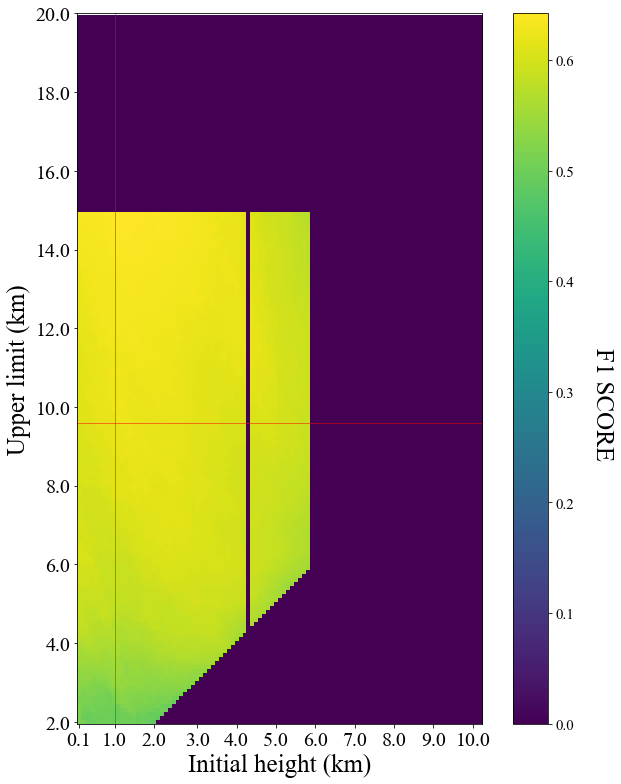

In [5]:
plt.figure(figsize=(17,11), tight_layout=True)

plt.imshow(matrix[1:104,20:200].T)

plt.gca().invert_yaxis()

plt.xticks(ticks=[0,9,19,30,40,50,60,70,80,90,100], 
           labels=['0.1','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'],
           fontproperties=font, 
           fontsize=20)
plt.yticks(ticks=[0,20,40,60,80,100,120,140,160,180], 
           labels=['2.0','4.0','6.0','8.0','10.0','12.0','14.0','16.0','18.0','20.0'],
           fontproperties=font, 
           fontsize=20)
       
plt.xlabel('Initial height (km)', 
           fontproperties=font,
           fontsize=25)
plt.ylabel('Upper limit (km)',
           fontproperties=font,
           fontsize=25)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(15)
        
cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=25,labelpad=40, y=0.45)

plt.axvline(x = 9, color = 'red',lw=0.5)
plt.axhline(y = 76, color = 'red',lw=0.5)

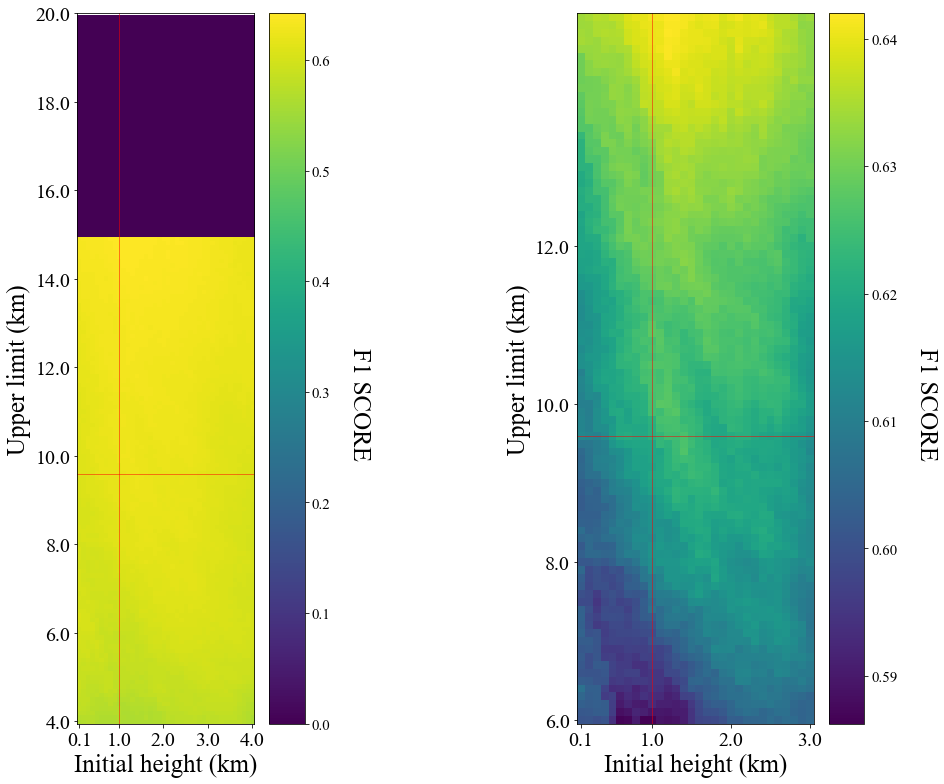

In [25]:

plt.figure(figsize=(17,11), tight_layout=True)
plt.subplot(121)
plt.imshow(matrix[1:41,40:200].T)

plt.gca().invert_yaxis()

plt.xticks(ticks=[0,9,19,29,39], 
           labels=['0.1','1.0','2.0','3.0','4.0'],
           fontproperties=font, 
           fontsize=20)
plt.yticks(ticks=[0,20,40,60,80,100,120,140,160], 
           labels=['4.0','6.0','8.0','10.0','12.0','14.0','16.0','18.0','20.0'],
           fontproperties=font, 
           fontsize=20)
       
plt.xlabel('Initial height (km)', 
           fontproperties=font,
           fontsize=25)
plt.ylabel('Upper limit (km)',
           fontproperties=font,
           fontsize=25)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(15)
        
cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=25,labelpad=40, y=0.45)

plt.axvline(x = 9, color = 'red',lw=0.5)
plt.axhline(y = 56, color = 'red',lw=0.5)




plt.subplot(122)
plt.imshow(matrix[1:31,60:150].T)

plt.gca().invert_yaxis()

plt.xticks(ticks=[0,9,19,29], 
           labels=['0.1','1.0','2.0','3.0'],
           fontproperties=font, 
           fontsize=20)
plt.yticks(ticks=[0,20,40,60], 
           labels=['6.0','8.0','10.0','12.0'],
           fontproperties=font, 
           fontsize=20)
       
plt.xlabel('Initial height (km)', 
           fontproperties=font,
           fontsize=25)
plt.ylabel('Upper limit (km)',
           fontproperties=font,
           fontsize=25)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(15)
        
cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=25,labelpad=40, y=0.45)

plt.axvline(x = 9, color = 'red',lw=0.5)
plt.axhline(y = 36, color = 'red',lw=0.5)

/Users/codefrom0/Documents/final_thesis/do_functions.py:320: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)


For the avg_dphi h001 - h064 :
Optimal threshold: = 10.01
F1score: 0.421

For the avg_dphi h001 - h077 :
Optimal threshold: = 6.75
F1score: 0.464

For the avg_dphi h001 - h060 :
Optimal threshold: = 5.94
F1score: 0.518

For the avg_dphi h001 - h060 :
Optimal threshold: = 5.94
F1score: 0.54

For the avg_dphi h001 - h073 :
Optimal threshold: = 4.52
F1score: 0.537

For the avg_dphi h001 - h068 :
Optimal threshold: = 4.29
F1score: 0.55

For the avg_dphi h001 - h068 :
Optimal threshold: = 3.92
F1score: 0.556

For the avg_dphi h001 - h068 :
Optimal threshold: = 3.29
F1score: 0.571

For the avg_dphi h001 - h068 :
Optimal threshold: = 3.29
F1score: 0.577

For the avg_dphi h001 - h068 :
Optimal threshold: = 2.87
F1score: 0.582



([<matplotlib.axis.YTick at 0x7fb86c875760>,
 [Text(0, 0, '0'), Text(0, 1, '1.0')])

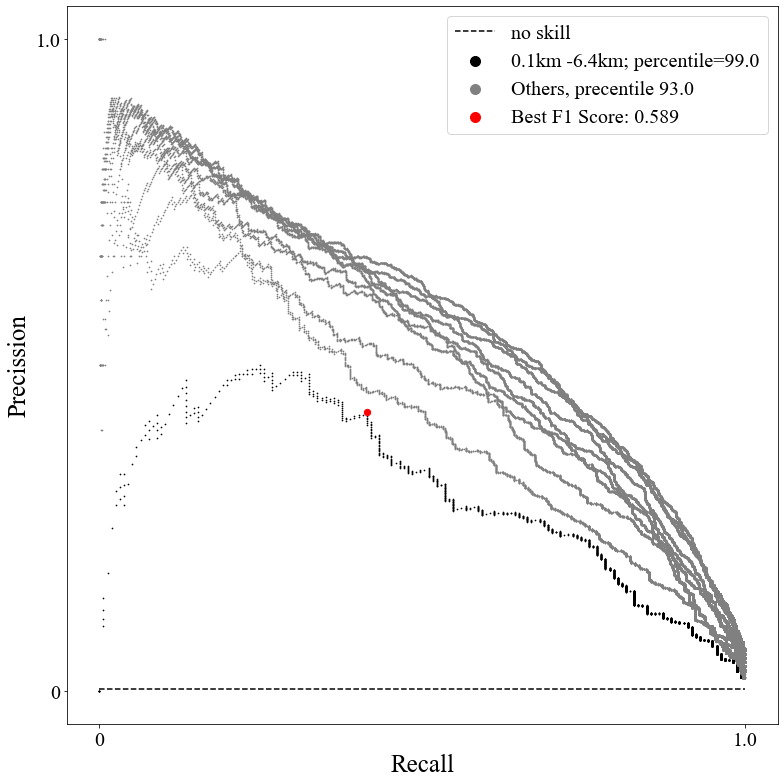

In [45]:
slicedf = df
p1,r1,p11,r11,truth,label1 = do.getPrecisionRecall(slicedf,0.1,6.4,0.99)
no_skill = len(truth[truth==1]) / len(truth)

p2,r2,p22,r22,truth2,label2 = do.getPrecisionRecall(slicedf,0.1,7.7,0.98)
p3,r3,p33,r33,truth3,label3 = do.getPrecisionRecall(slicedf,0.1,6.0,0.97)
p4,r4,p44,r44,truth4,label4 = do.getPrecisionRecall(slicedf,0.1,6.0,0.96)
p5,r5,p55,r55,truth5,label5 = do.getPrecisionRecall(slicedf,0.1,7.3,0.95)
p6,r6,p66,r66,truth6,label6 = do.getPrecisionRecall(slicedf,0.1,6.8,0.94)
p7,r7,p77,r77,truth7,label7 = do.getPrecisionRecall(slicedf,0.1,6.8,0.93)
p8,r8,p88,r88,truth8,label8 = do.getPrecisionRecall(slicedf,0.1,6.8,0.92)
p9,r9,p99,r99,truth9,label9 = do.getPrecisionRecall(slicedf,0.1,6.8,0.91)
p10,r10,p1010,r1010,truth10,label10 = do.getPrecisionRecall(slicedf,0.1,6.8,0.90)


plt.figure(figsize=(11,11), tight_layout=True)

plt.scatter(r1,p1,label=label1,s=0.5,c='black')

plt.scatter(r2,p2,label='Others, precentile 93.0',s=0.5,c='gray')
plt.scatter(r3,p3,s=0.5,c='gray')
plt.scatter(r4,p4,s=0.5,c='gray')
plt.scatter(r5,p5,s=0.5,c='gray')
plt.scatter(r6,p6,s=0.5,c='gray')
plt.scatter(r7,p7,s=0.5,c='gray')
plt.scatter(r8,p8,s=0.5,c='gray')
plt.scatter(r9,p9,s=0.5,c='gray')
plt.scatter(r10,p10,s=0.5,c='gray')
plt.scatter(r11,p11,s=40,label='Best F1 Score: '+str(np.round(y[x,4],3)),c='r')


plt.plot([0, 1], [no_skill, no_skill], linestyle='--', c='black',label='no skill')


lgnd = plt.legend(scatterpoints=1,
                  prop= FontProperties(family='Times New Roman',style='normal', size=20))

lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
lgnd.legendHandles[3]._sizes = [100]



plt.xlabel('Recall', 
           fontproperties=font,
           fontsize=25)
plt.ylabel('Precission',
           fontproperties=font,
           fontsize=25)

plt.xticks(ticks=[0,1], 
           labels=['0','1.0'],
           fontproperties=font, 
           fontsize=20)
plt.yticks(ticks=[0,1], 
           labels=['0','1.0'],
           fontproperties=font, 
           fontsize=20)

In [55]:
print(p1010,r1010)

0.5242248062015504 0.6529873264936632


### 96% percentile for True precipitation

In [27]:
matrix = np.empty([101,151])
results=[]
print(matrix.max())
print(matrix)
for hi in his:
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.96)
            matrix[i][j] = array[4]
            results.append(array)     

0.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[ 1.8        10.2         1.61232     2.95216671  0.47328819]


For the avg_dphi h010 - h080 :
Optimal threshold: = 1.83
F1score: 0.62

For the avg_dphi h001 - h080 :
Optimal threshold: = 4.23
F1score: 0.447

For the avg_dphi h001 - h045 :
Optimal threshold: = 5.5
F1score: 0.414



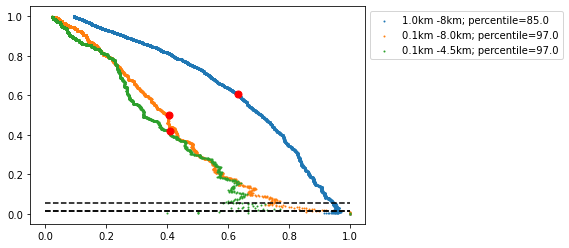

In [35]:
do.plotPrecisionRecall(df,1.0,8,0.85)
do.plotPrecisionRecall(df,0.1,8.0,0.97)
do.plotPrecisionRecall(df,0.1,4.5,0.97)

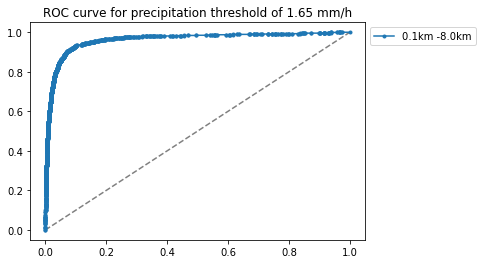

In [22]:
do.plotROC(df,0.1,8.0,0.97)

### 96% percentile for True precipitation

In [11]:
results = []
for hi in his:
    for hf in hfs:
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.96)
            results.append(array)

In [12]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        8.         1.7338     4.23510011 0.52018779]


For the avg_dphi h010 - h080 :
Optimal threshold: = 3.84
F1score: 0.503

For the avg_dphi h001 - h080 :
Optimal threshold: = 4.24
F1score: 0.52

For the avg_dphi h001 - h045 :
Optimal threshold: = 5.08
F1score: 0.498



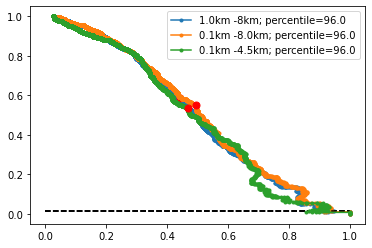

In [13]:
do.plotPrecisionRecall(df,1.0,8,0.96)
do.plotPrecisionRecall(df,0.1,8.0,0.96)
do.plotPrecisionRecall(df,0.1,4.5,0.96)

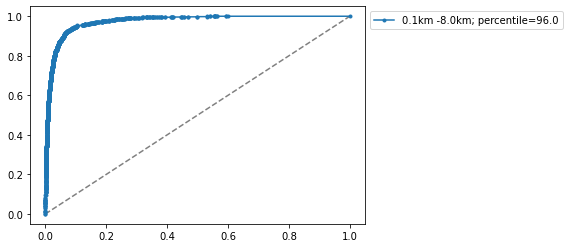

In [14]:
do.plotROC(df,0.1,8.0,0.96)

### 65% percentile for True precipitation

In [22]:
results = []
for hi in his:
    for hf in hfs:
        if hi<hf:
            array = do.getF1score(df,hi,hf,0.65)
            results.append(array)

In [23]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        8.         0.153      0.94244797 0.66943423]


For the avg_dphi h010 - h200 :
Optimal threshold: = 0.5
F1score: 0.605

For the avg_dphi h001 - h045 :
Optimal threshold: = 1.2
F1score: 0.653

For the avg_dphi h001 - h080 :
Optimal threshold: = 0.94
F1score: 0.669



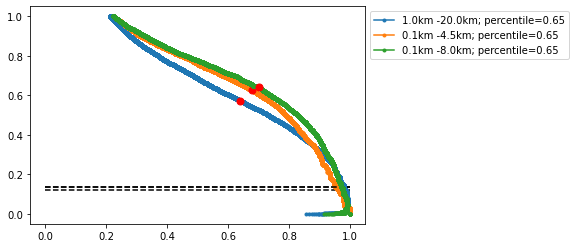

In [5]:
do.plotPrecisionRecall(df,1.0,20.0,0.65)
do.plotPrecisionRecall(df,0.1,4.5,0.65)
do.plotPrecisionRecall(df,0.1,8.0,0.65)

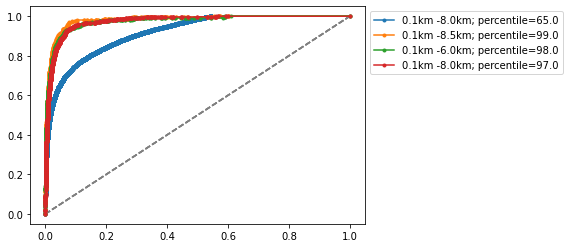

In [3]:
do.plotROC(df,0.1,8.0,0.65)
do.plotROC(df,0.1,8.5,0.99)
do.plotROC(df,0.1,6.0,0.98)
do.plotROC(df,0.1,8.0,0.97)

For the avg_dphi h001 - h080 :
Optimal threshold: = 0.94
F1score: 0.669

For the avg_dphi h001 - h085 :
Optimal threshold: = 7.62
F1score: 0.416

For the avg_dphi h001 - h060 :
Optimal threshold: = 5.94
F1score: 0.476

For the avg_dphi h001 - h080 :
Optimal threshold: = 4.24
F1score: 0.477



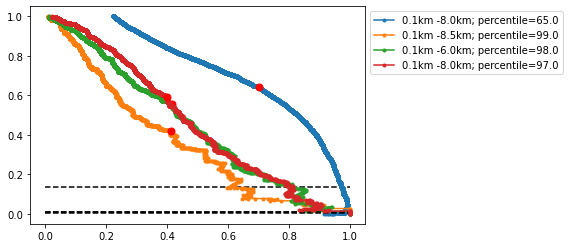